 
## Assignment 4 - Simple linear regression  
## 2) Salary_hike -> Build a prediction model for Salary_hike


## 1.import Necessary libraries

In [72]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression


# 2.import data


In [5]:
salary_data=pd.read_csv('Salary_Data.csv')

In [8]:
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Data understanding

### initial analysis

In [10]:
salary_data.shape

(30, 2)

In [11]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

### perform assumption check

### liniarity check

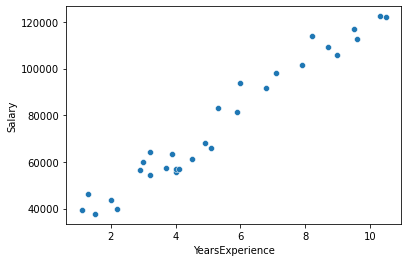

In [16]:
sns.scatterplot(x='YearsExperience',y='Salary',data=salary_data)
plt.show()

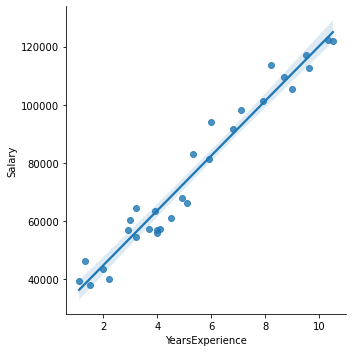

In [19]:
sns.lmplot( x='YearsExperience',y='Salary',data=salary_data)
plt.show()

### check for normality

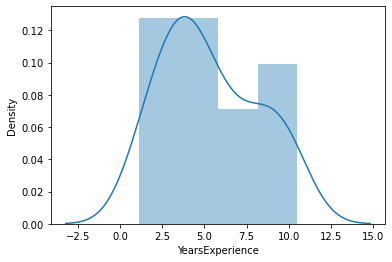

In [22]:
sns.distplot(a=salary_data["YearsExperience"],hist=True)
plt.show()

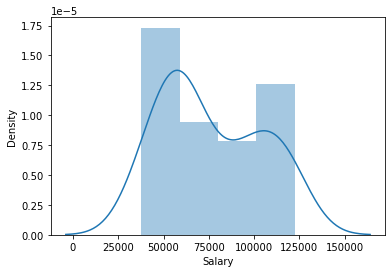

In [23]:
sns.distplot(a=salary_data['Salary'],hist=True)
plt.show()

In [24]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# data preparation

In [35]:
salary_data.rename(columns={"YearsExperience":'YE','Salary':'S'},inplace=True)

# model building || model training

In [36]:
linear_reg_model1=smf.ols(formula=('S~YE'),data=salary_data).fit()


In [40]:
prediction=linear_reg_model1.predict(salary_data['YE']).round(2)

In [41]:
prediction

0      36187.16
1      38077.15
2      39967.14
3      44692.12
4      46582.12
5      53197.09
6      54142.09
7      56032.08
8      56032.08
9      60757.06
10     62647.05
11     63592.05
12     63592.05
13     64537.05
14     68317.03
15     72097.02
16     73987.01
17     75877.00
18     81546.98
19     82491.97
20     90051.94
21     92886.93
22    100446.90
23    103281.89
24    108006.87
25    110841.86
26    115566.84
27    116511.84
28    123126.81
29    125016.80
dtype: float64

In [42]:
linear_reg_model1.params

Intercept    25792.200199
YE            9449.962321
dtype: float64

In [44]:
linear_reg_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           1.14e-20
Time:                        00:09:34   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
salary_data

,YE,S
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [48]:
error=salary_data['S']-prediction
error

0      3155.84
1      8127.85
2     -2236.14
3     -1167.12
4     -6691.12
5      3444.91
6      6007.91
7     -1587.08
8      8412.92
9     -3568.06
10      570.95
11    -7798.05
12    -6635.05
13    -7456.05
14    -7206.03
15    -4159.02
16    -7958.01
17     7211.00
18     -183.98
19    11448.03
20     1686.06
21     5386.07
22      855.10
23    10530.11
24     1424.13
25    -5259.86
26     1402.16
27    -3876.84
28     -735.81
29    -3144.80
dtype: float64

# log Transformation

In [62]:
salary_data['log_YE']=np.log(salary_data['YE']+1)

In [63]:
def diagnostic_plot(df,variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

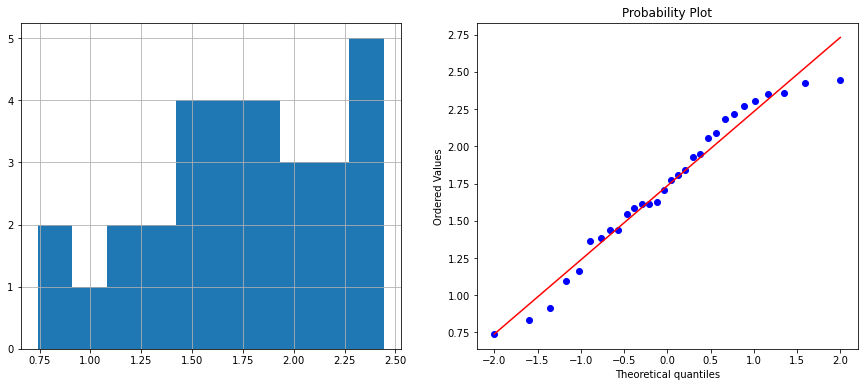

In [64]:
diagnostic_plot(salary_data,"log_YE")

### model building and training using log transferd independent feature

In [65]:
lin_reg_model2=smf.ols(formula="S~log_YE",data=salary_data).fit()

In [66]:
lin_reg_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           3.30e-15
Time:                        08:12:54   Log-Likelihood:                -314.88
No. Observations:                  30   AIC:                             633.8
Df Residuals:                      28   BIC:                             636.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.645e+04   6222.341     -2.644      0.013   -2.92e+04   -3706.414
log_YE      5.327e+04   3456.242     15.413      0.000    4.62e+04    6.04e+04
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.678
Skew:                           0.048   Prob(JB):                        0.712
Kurtosis:                       2.270   Cond. No.                         8.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Reciprocal transformation

In [67]:
salary_data['recp_YE']=1/(salary_data['YE']+1)

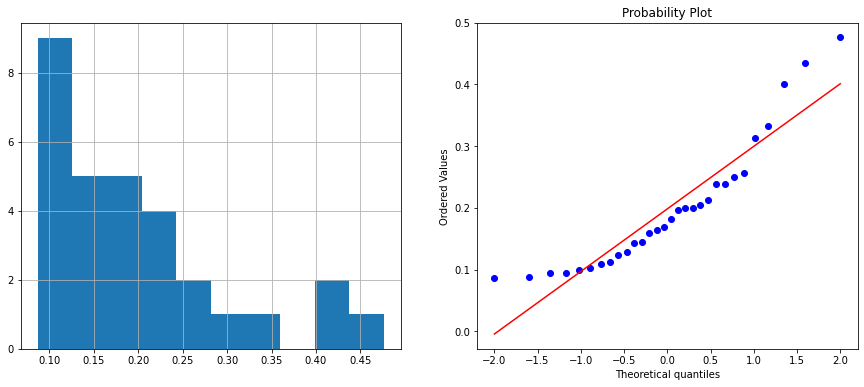

In [68]:
diagnostic_plot(salary_data,"recp_YE")

#### model building using reciprocal transformed independent feature

In [69]:
lin_reg_model3=smf.ols(formula="S~recp_YE",data=salary_data).fit()

In [70]:
lin_reg_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     73.45
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           2.58e-09
Time:                        08:18:03   Log-Likelihood:                -329.31
No. Observations:                  30   AIC:                             662.6
Df Residuals:                      28   BIC:                             665.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.204e+05   5834.566     20.642      0.000    1.08e+05    1.32e+05
recp_YE    -2.239e+05   2.61e+04     -8.570      0.000   -2.77e+05    -1.7e+05
==============================================================================
Omnibus:                        5.402   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                2.000
Skew:                           0.222   Prob(JB):                        0.368
Kurtosis:                       1.815   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion
#### amog all the models  we can choose the linear_reg_model1 because it has more r squared value and also low AIC and BIC values